In [1]:
from sympy import *
import scipy
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def expected(n, truth=0):
    if truth:
        print(f"The following results are for polynomials of degree {n}")
    vector = []
    x = symbols('x')
    for i in range(n+1):
        index = n-i
        nCk = math.comb(n, index)
        vector.append(math.sqrt(nCk)*x**index)
    normalized = 0
    for ele in vector:
        normalized += ele**2
    normalized**=(1/2)
    norm_vector = []
    for ele in vector:
        norm_vector.append(ele/normalized)
    if truth:
        print("The normalized vector is of the form: \n", norm_vector)
    deriv_norm = []
    for ele in norm_vector:
        derivative = Derivative(ele, x).doit()
        deriv_norm.append(derivative)
    arc_length = 0
    for ele in deriv_norm:
        new_ele = ele**2
        arc_length += new_ele
    arc_length **= (1/2)
    if truth:
        print("The arc length function of the derivative of the previously given vector is: \n", arc_length)
    lam_f = lambdify(x, arc_length)
    integral = scipy.integrate.quad(lam_f, -np.inf, np.inf)[0] / math.pi
    if truth:
        print(f"The expected value of real roots of a {n}th polynomial is {integral}\n")
    return integral

The following results are for polynomials of degree 1
The normalized vector is of the form: 
 [1.0*x/(1.0*x**2 + 1.0)**0.5, 1.0/(1.0*x**2 + 1.0)**0.5]
The arc length function of the derivative of the previously given vector is: 
 (1.0*x**2/(1.0*x**2 + 1.0)**3.0 + (-1.0*x**2/(1.0*x**2 + 1.0)**1.5 + 1.0/(1.0*x**2 + 1.0)**0.5)**2)**0.5
The expected value of real roots of a 1th polynomial is 1.0

The following results are for polynomials of degree 2
The normalized vector is of the form: 
 [0.707106781186547*x**2/(0.5*x**4 + x**2 + 0.5)**0.5, 1.0*x/(0.5*x**4 + x**2 + 0.5)**0.5, 0.707106781186547/(0.5*x**4 + x**2 + 0.5)**0.5]
The arc length function of the derivative of the previously given vector is: 
 1.41421356237309*(0.25*(-1.0*x**3 - 1.0*x)**2/(0.5*x**4 + x**2 + 0.5)**3.0 + 0.5*(1.0*x*(-1.0*x**3 - 1.0*x)/(0.5*x**4 + x**2 + 0.5)**1.5 + 1.0/(0.5*x**4 + x**2 + 0.5)**0.5)**2 + (0.5*x**2*(-1.0*x**3 - 1.0*x)/(0.5*x**4 + x**2 + 0.5)**1.5 + x/(0.5*x**4 + x**2 + 0.5)**0.5)**2)**0.5
The expected 

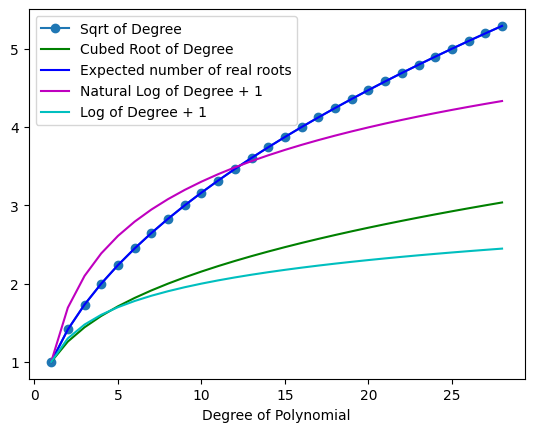

In [3]:
for i in range(10):
    expected(i+1, 1)
x_values = []
y_values = []
sqrt_values = []
cubedroots = []
natural_log = []
log_degree = []
logadd1 = []
for i in range(28):
    x = i+1
    x_values.append(x)
    y_values.append(expected(x))
    sqrt_values.append(math.sqrt(x))
    cubedroots.append(x**(1/3))
    natural_log.append(math.log(x)+1)
    log_degree.append(math.log(x,10))
    logadd1.append(math.log(x,10)+1)

plt.plot(x_values, sqrt_values, '-o', label="Sqrt of Degree")
plt.plot(x_values, cubedroots, '-g', label="Cubed Root of Degree")
plt.plot(x_values, y_values, '-b', label="Expected number of real roots")
plt.plot(x_values, natural_log, '-m', label="Natural Log of Degree + 1")
plt.plot(x_values, logadd1, '-c', label="Log of Degree + 1")
plt.xlabel("Degree of Polynomial")
plt.legend(loc="upper left")
plt.show()